# Color-magnitude diagram: broadband filters

This tutorial shows how to create a color-magnitude diagram which combines the photometry of field and young/low-gravity objects, synthetic photometry computed from isochrones and model spectra, and photometry of directly imaged planets and brown dwarfs.

## Initiating *species*

We start by importing the required modules.

In [1]:
import urllib.request
import numpy as np
import species

Next, we initiate the `species` workflow and create an instance of `Database`.

In [2]:
species.SpeciesInit()
database = species.Database()

Initiating species v0.4.0... [DONE]
Creating species_config.ini... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


## Adding data to the database

Available magnitudes and spectra of directly imaged planets and brown dwarfs are added to the database with `add_companion` by setting `name=None`. These data are extracted from the [two dictionaries](https://github.com/tomasstolker/species/blob/master/species/data/companions.py) in the `data.companions` module.

In [3]:
database.add_companion(name=None, verbose=False)

Adding Vega spectrum... [DONE]


/Users/tomasstolker/applications/species/species/data/filters.py:210: UserWarning: The minimum transmission value of Subaru/CIAO.z is smaller than zero (-1.80e-03). Wavelengths with negative transmission values will be removed.
  warnings.warn(


We also add the photometry and parallaxes of the [Database of Ultracool Parallaxes](http://www.as.utexas.edu/~tdupuy/plx/Database_of_Ultracool_Parallaxes.html).

In [4]:
database.add_photometry('vlm-plx')

Adding Database of Ultracool Parallaxes... [DONE]


The isochrones from the AMES-Cond and AMES-Dusty are downloaded with `urllib.request`. These were retrieved from https://phoenix.ens-lyon.fr/Grids/.

In [5]:
urllib.request.urlretrieve('https://home.strw.leidenuniv.nl/~stolker/species/model.AMES-Cond-2000.M-0.0.NaCo.Vega',
                           'data/model.AMES-Cond-2000.M-0.0.NaCo.Vega')

('data/model.AMES-Cond-2000.M-0.0.NaCo.Vega',
 <http.client.HTTPMessage at 0x14bd59490>)

In [6]:
urllib.request.urlretrieve('https://home.strw.leidenuniv.nl/~stolker/species/model.AMES-dusty.M-0.0.NaCo.Vega',
                           'data/model.AMES-dusty.M-0.0.NaCo.Vega')

('data/model.AMES-dusty.M-0.0.NaCo.Vega',
 <http.client.HTTPMessage at 0x14bd59c70>)

And the isochronse are added to the database.

In [7]:
database.add_isochrones(filename='data/model.AMES-Cond-2000.M-0.0.NaCo.Vega',
                        tag='iso_cond',
                        model='baraffe')

database.add_isochrones(filename='data/model.AMES-dusty.M-0.0.NaCo.Vega',
                        tag='iso_dusty',
                        model='baraffe')

Adding isochrones: iso_cond... [DONE]
Adding isochrones: iso_dusty... [DONE]


Finally, the AMES-Cond grid with synthetic spectra are downloaded and added. Spectra with Teff values outside the chosen `teff_range` are excluded.

In [8]:
database.add_model(model='ames-cond',
                   teff_range=(100., 4000.))

Unpacking AMES-Cond model spectra (150 MB)... [DONE]
Adding AMES-Cond model spectra... [DONE]                               
Grid points stored in the database:
   - Teff = [ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200.
 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400.
 2500. 2600. 2700. 2800. 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600.
 3700. 3800. 3900. 4000.]
   - log(g) = [2.5 3.  3.5 4.  4.5 5.  5.5]
Number of grid points per parameter:
   - teff: 40
   - logg: 7


/Users/tomasstolker/applications/species/species/util/data_util.py:295: RuntimeWarning: divide by zero encountered in log10
  flux = np.log10(flux)


Fix missing grid points with a linear interpolation:
   - teff = 200.0, logg = 5.5
   - teff = 900.0, logg = 2.5
Number of stored grid points: 280
Number of interpolated grid points: 2
Number of missing grid points: 0


The spectra at two grid points were missing in the original grid. These have been linearly interpolated *species* from neighboring grid points.

Also the AMES-Dusty spectra are also downloaded and imported into the database.

In [9]:
database.add_model(model='ames-dusty',
                   teff_range=(100., 4000.))

Unpacking AMES-Dusty model spectra (59 MB)... [DONE]
Adding AMES-Dusty model spectra... [DONE]                                
Grid points stored in the database:
   - Teff = [ 500.  600.  700.  800.  900. 1000. 1100. 1200. 1300. 1400. 1500. 1600.
 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800.
 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000.]
   - log(g) = [3.5 4.  4.5 5.  5.5 6. ]
Number of grid points per parameter:
   - teff: 36
   - logg: 6
Fix missing grid points with a linear interpolation:
   - teff = 900.0, logg = 6.0
   - teff = 1200.0, logg = 5.5
   - teff = 2100.0, logg = 3.5
   - teff = 2100.0, logg = 4.5
   - teff = 2200.0, logg = 3.5
   - teff = 2400.0, logg = 5.0
   - teff = 3100.0, logg = 3.5
   - teff = 3200.0, logg = 3.5
   - teff = 3300.0, logg = 3.5
   - teff = 3400.0, logg = 3.5
   - teff = 3500.0, logg = 3.5
   - teff = 3600.0, logg = 3.5
   - teff = 3700.0, logg = 3.5
   - teff = 3800.0, logg = 3.5
   - teff = 390

A number of spectra were missing of which 6 have been interpolated. For 15 spectra this was not possible because of incompleteness of the grid so these fluxes have been set to zero. Therefore, one needs to be careful when interpolating spectra in those parts of the parameter space.

The `list_content` method of the `Database` object (i.e. `database.list_content()` in this case) can be used to print an overview of all the data that is stored in the database.

## Synthetic photometry from isochrones

Magnitudes from the isochrone data can be extracted with the `get_isochrone` function of `ReadIsochrone`. However, in this example, we consistently recompute the synthetic photometry by making use of both the evolutionary trakcs and the synthetic spectra.

The isochrones will be iterpolated for three different ages and the synthetic photometry is computed at 100 logarithmically spaced masses.

In [10]:
ages = [20., 100., 1000.]  # (Myr)
masses = np.logspace(0., 3., 100)  # (Mjup)

Objects of `ReadIsochones` are initiated for both the AMES-Cond and AMES-Dusty isochrones. We note though that the evolutionary data of these two models are actually the same. Only the magnitudes of the isochrones (which we do not use) are different.

In [11]:
read_iso_cond = species.ReadIsochrone(tag='iso_cond')
read_iso_dusty = species.ReadIsochrone(tag='iso_dusty')

The colors and magnitudes are computed by chosing the corresponding model grids from the database. The output is stored in `ColorMagBox` objects for the three different ages.

In [12]:
boxes = []

for item in ages:

    modelcolor1 = read_iso_cond.get_color_magnitude(age=item,
                                                    masses=masses,
                                                    model='ames-cond',
                                                    filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                                    filter_mag='MKO/NSFCam.Lp')

    modelcolor2 = read_iso_dusty.get_color_magnitude(age=item,
                                                     masses=masses,
                                                     model='ames-dusty',
                                                     filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                                     filter_mag='MKO/NSFCam.Lp')

    boxes.append(modelcolor1)
    boxes.append(modelcolor2)

/Users/tomasstolker/applications/species/species/read/read_isochrone.py:303: UserWarning: The value of teff is 4018.701890028295, which is above the upper bound of the model grid (4000.0). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 4018.701890028295, 'logg': 4.3520097138585845, 'mass': 932.60334688322, 'distance': 10.0}.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:303: UserWarning: The value of teff is 4163.517520486652, which is above the upper bound of the model grid (4000.0). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 4163.517520486652, 'logg': 4.329146850334322, 'mass': 1000.0, 'distance': 10.0}.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:278: UserWarning: The value of logg is 2.917784581524866, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 501.3

/Users/tomasstolker/applications/species/species/read/read_isochrone.py:278: UserWarning: The value of logg is 2.835249340828809, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 501.6401624899111, 'logg': 2.835249340828809, 'mass': 1.2328467394420661, 'distance': 10.0}.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:278: UserWarning: The value of logg is 2.855554520370349, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 501.6536660458051, 'logg': 2.855554520370349, 'mass': 1.321941148466029, 'distance': 10.0}.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:278: UserWarning: The value of logg is 2.8798041133905197, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff

/Users/tomasstolker/applications/species/species/read/read_isochrone.py:255: UserWarning: The value of Teff is NaN for the following isochrone sample: {'teff': nan, 'logg': nan, 'mass': 1.4174741629268053, 'distance': 10.0}. Setting the magnitudes to NaN.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:255: UserWarning: The value of Teff is NaN for the following isochrone sample: {'teff': nan, 'logg': nan, 'mass': 1.5199110829529336, 'distance': 10.0}. Setting the magnitudes to NaN.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:255: UserWarning: The value of Teff is NaN for the following isochrone sample: {'teff': nan, 'logg': nan, 'mass': 1.6297508346206442, 'distance': 10.0}. Setting the magnitudes to NaN.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:255: UserWarning: The value of Teff is NaN for the following isochrone sample: {'teff': nan, 'logg': nan, 'ma

Some warnings are printed when Teff or log(g) from the evolutionary tracks are outside the parameter boundaries of the grid with spectra. Also, some of the chosen masses are below the lowest masses that are available in the evolutionary tracks. Therefore these colors and magnitudes are set to NaN and will be ignored when plotting the isochrones later one.

## Synthetic photometry from blackbody spectra

In addition to the isochrones, we also calculate colors and magnitudes for blackbody radiation. We start by creating an instance of `ReadPlanck` for a wavelength range between 0.5 and 10 um.

In [13]:
read_planck = species.ReadPlanck(wavel_range=(0.5, 10.))

Next, we use the `get_color_magnitude` methode to calculate the synthetic photometry for the same filters from before. Here we chose 100 logarithmically-spaced temperatures between 100 and 10000 K. The radius, which only impacts the absolute magnitude, is set to 1 Rjup.

In [14]:
color_planck = read_planck.get_color_magnitude(temperatures=np.logspace(2, 4, 100),
                                               radius=1.,
                                               filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                               filter_mag='MKO/NSFCam.Lp')

The returned `ColorMagBox` is added to the list of `boxes`.

In [15]:
boxes.append(color_planck)

## Photometry of directly imaged objects

We will also create a list with names and filters of the directly imaged planets and brown dwarfs that we want to show. The `list_companions` method of `Database` can be used to get an overview of all available photometric data in the database. We create a list with object names and filters for the colors and magnitudes that we want to include in the color-magnitude diagram.

In [16]:
objects = [('HR 8799 b', 'Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HR 8799 c', 'Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HR 8799 d', 'Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HR 8799 e', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('kappa And b', 'Subaru/CIAO.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp'),
           ('GSC 06214 B', 'MKO/NSFCam.H', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Lp'),
           ('ROXs 42 Bb', 'Keck/NIRC2.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp'),
           ('51 Eri b', 'MKO/NSFCam.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp'),
           ('2M1207 B', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('2M0103 ABb', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('1RXS 1609 B', 'Gemini/NIRI.H-G0203w', 'Gemini/NIRI.Lprime-G0207w', 'Gemini/NIRI.Lprime-G0207w'),
           ('beta Pic b', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HIP 65426 b', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('PZ Tel B', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HD 206893 B', 'Paranal/SPHERE.IRDIS_B_H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp')]

## Reading color-magnitude data

The colors and magnitude of the Database of Ultracool Parallaxes are read from the database by creating an object of `ReadColorMagnitude`.

In [17]:
colormag = species.ReadColorMagnitude(library='vlm-plx',
                                      filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                      filter_mag='MKO/NSFCam.Lp')

And then extracting the `ColorMagBox` objects for field and young/low-gravity objects separately.

In [18]:
color_field = colormag.get_color_magnitude(object_type='field')
color_young = colormag.get_color_magnitude(object_type='young')

Also these `ColorMagBox` objects are added to the list of `boxes`.

In [19]:
boxes.append(color_field)
boxes.append(color_young)

## Plotting a color-magnitude diagram

The color-magnitude diagram is now plotted with the `plot_color_magnitude` function. The list with `boxes` is provided as argument of the `boxes` parameter. The list with `objects` is provided separately as argument of `objects`. See the [documentation](https://species.readthedocs.io/en/latest/species.plot.html?highlight=plot_color_mag#species.plot.plot_color.plot_color_magnitude) of `plot_color_magnitude` for further details on the function parameters.

In [23]:
species.plot_color_magnitude(boxes=boxes,
                             objects=objects,
                             mass_labels=[3., 5., 10., 20., 50.],
                             companion_labels=False,
                             field_range=('late M', 'late T'),
                             label_x=r'H - L$^\prime$',
                             label_y=r'M$_\mathregular{L\prime}$',
                             xlim=(0.3, 4.),
                             ylim=(15., 7.1),
                             offset=(-0.08, -0.09),
                             legend=(0.04, 0.04),
                             output='color_mag.png')

Plotting color-magnitude diagram: color_mag.png... [DONE]


Let's have a look at the plot!

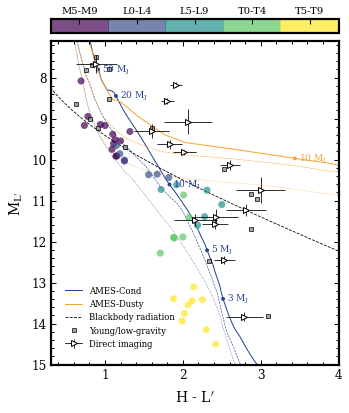

In [23]:
from IPython.display import Image
Image('color_mag.png')